# Feature Extraction
## Spectral Rolloff

- spectral rolloff is a measure of the shape of signal
- it represents the frequency below which a specified % of the total spectral energy lies (example 85% lies)

In [1]:
# Library being used is librosa.feature.spectral_rolloff
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import minmax_scale

In [2]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is E6A4-8B48

 Directory of C:\Users\HP\Audio Processing

09-12-2023  23:05    <DIR>          .
09-12-2023  19:49    <DIR>          ..
09-12-2023  23:03    <DIR>          .ipynb_checkpoints
09-12-2023  21:50        43,557,767 Audio Processing.ipynb
09-12-2023  21:57         7,071,564 Beat Retrival from Music.ipynb
09-12-2023  21:37         2,447,277 bensound-breath.mp3
09-12-2023  22:23         2,072,367 bensound-orangemoon.mp3
09-12-2023  19:54         6,796,585 bensound-riddledwitherrors.mp3
09-12-2023  21:36         4,469,781 bensound-urban.mp3
09-12-2023  22:48         2,457,600 bensound-windowtotheworld.mp3.crdownload
09-12-2023  22:38         5,202,207 Feature Extraction.ipynb
09-12-2023  22:12         2,415,112 Music Generator.ipynb
09-12-2023  23:02         6,169,722 Spectral Centeroid.ipynb
09-12-2023  23:05               861 Spectral Rolloff.ipynb
09-12-2023  22:10           882,044 stereo_file.wav
09-12-2023  22:11      

In [3]:
source_audio = 'bensound-windowtotheworld.mp3.crdownload'

In [4]:
wave_x, sample_rate = librosa.load(source_audio) # for loading the audio
ipd.Audio(wave_x, rate= sample_rate)

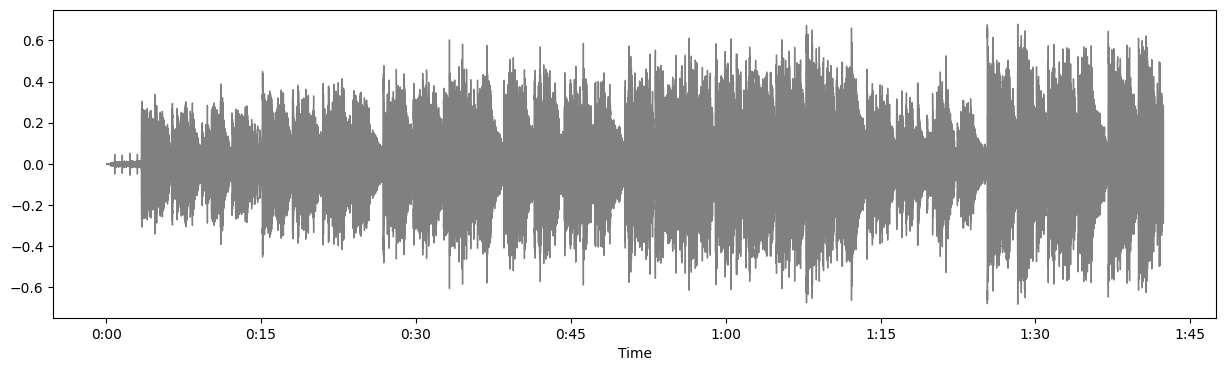

In [5]:
plt.figure(figsize=(15,4), facecolor=(1,1,1)) # defining the plot size
librosa.display.waveshow(wave_x, sr= sample_rate, color='gray') # we are passing the array, sample rate, colour of the graph

In [13]:
# spherical centroid
# weighted mean of frequencies
all_spectral_rolloff = librosa.feature.spectral_rolloff(y=wave_x, sr= sample_rate)

In [14]:
all_spectral_rolloff

array([[8903.97949219, 8128.78417969, 6061.59667969, ..., 2357.88574219,
        2347.11914062, 2325.5859375 ]])

In [15]:
all_spectral_rolloff.shape

(1, 4409)

In [16]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=wave_x, sr=sample_rate)[0]
spectral_rolloff.shape

(4409,)

In [17]:
# Computing the time variable for visualization
frames = range(len(spectral_rolloff))

In [18]:
frames

range(0, 4409)

In [19]:
t = librosa.frames_to_time(frames)
t

array([0.00000000e+00, 2.32199546e-02, 4.64399093e-02, ...,
       1.02307120e+02, 1.02330340e+02, 1.02353560e+02])

In [21]:
# normalizing the spectral rolloff for visualisation
def normalise(x, axis=0):
    return minmax_scale(x, axis=axis)

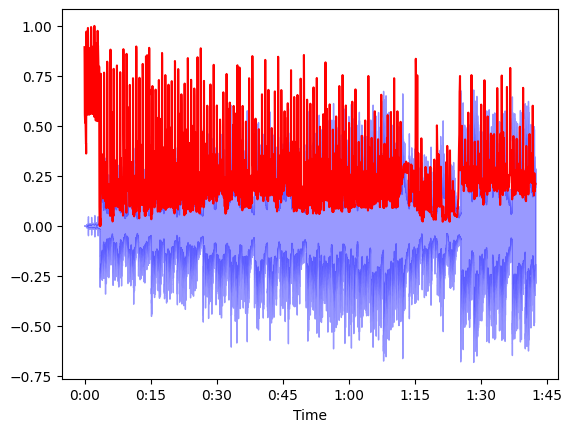

In [22]:
# Plotting the spectral rolloff along the waveform
librosa.display.waveshow(wave_x,alpha =0.4, color='b')
plt.plot(t, normalise(spectral_rolloff), color='r')